# Quantitative Investment Lab
A note of Ex10si0n for learning Python-QI

## Basic Terms

### Annualized rate of return

Simply sum up [1]
\begin{equation}
\text{annualized rate of return} = \frac{\sum{r_i}}{T} \times m
\end{equation}

Compound interest [2]
\begin{equation}
\text{annualized rate of return} = [\prod (1 + r_i) ]^{1/(T/m))} -1
\end{equation}

In [1]:
# Install pandas-datareader
# !pip install pandas-datareader

In [2]:
# Packages Import
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import math

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2015-12-31  26.757500  26.205000  26.752501  26.315001  163649200.0  24.182106
2016-01-04  26.342501  25.500000  25.652500  26.337500  270597600.0  24.202784
2016-01-05  26.462500  25.602501  26.437500  25.677500  223164000.0  23.596279
2016-01-06  25.592501  24.967501  25.139999  25.174999  273829600.0  23.134508
2016-01-07  25.032499  24.107500  24.670000  24.112499  324377600.0  22.158121


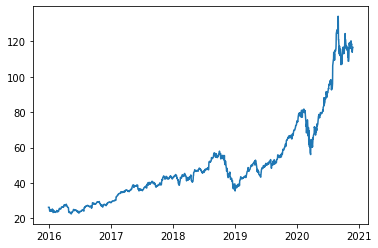

In [3]:
# Read Apple Inc Stocks from 2016 till now
start = datetime.datetime(2016, 1, 1) # or start = '1/1/2016'
end = datetime.date.today()
stock = web.DataReader('AAPL', 'yahoo', start, end)
print(stock.head())  # print first rows of the prices data
plt.plot(stock.Close)

**Calculating [1]**

In [4]:
close = stock.Close
close.index = pd.to_datetime(close.index)
lagclose = close.shift(1)
lagclose.head()

Date
2015-12-31          NaN
2016-01-04    26.315001
2016-01-05    26.337500
2016-01-06    25.677500
2016-01-07    25.174999
Name: Close, dtype: float64

In [5]:
# Calculation of simple return
simpleret = (close - lagclose) / lagclose
simpleret.name = 'simpleret'
simpleret.head()

Date
2015-12-31         NaN
2016-01-04    0.000855
2016-01-05   -0.025059
2016-01-06   -0.019570
2016-01-07   -0.042205
Name: simpleret, dtype: float64

In [6]:
# Calculation of annualize return
annualize = (1 + simpleret).cumprod()[-1] ** (245/311) - 1
print("Annualize Return of APPL from 2016 till now:", annualize)

Annualize Return of APPL from 2016 till now: 2.230483162568333


In [7]:
# Calculation of continuous compounding return
comporet = np.log(close / lagclose)
comporet.name = 'comporet'
comporet.head()

Date
2015-12-31         NaN
2016-01-04    0.000855
2016-01-05   -0.025379
2016-01-06   -0.019764
2016-01-07   -0.043121
Name: comporet, dtype: float64

#### Draw Diagrams

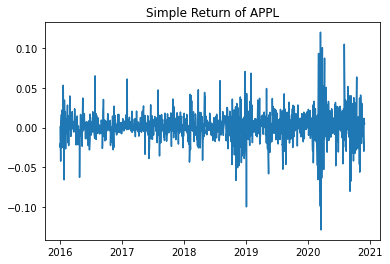

In [8]:
# SimpleRet
plt.plot(simpleret)
plt.title('Simple Return of APPL')
plt.show()

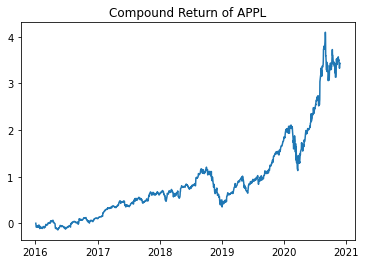

In [9]:
# Compounding Return
cumRet = (1 + simpleret).cumprod() - 1
plt.plot(cumRet)
plt.title('Compound Return of APPL')
plt.show()

### Method of Risk Measurement

#### Markowitz Mean-Variance Portfolio Theory

R: Return Rate that could happen

Single
\begin{equation}
\sigma^2(R) = E\left( \left( R - E(R) \right)^2 \right)
\end{equation}

Multiple
\begin{equation}
\sigma^2(R) = \sum_{K}p_k \left( R_k - E(R) \right)
\end{equation}

#### Downside Risk

\begin{equation}
\sigma(R, \text{MARR}) = \sqrt{E{[\text{min}(R-\text{MARR}, 0)]^2}}
\end{equation}

In [10]:
# Standard Deviation
print("s.d. of APPL:", simpleret.std())

s.d. of APPL: 0.019037107495588367


In [11]:
# Downside Risk
def cal_half_dev(returns):
    mu = returns.mean()
    tmp = returns[returns < mu]
    half_deviation = (sum((mu - tmp) ** 2) / len(returns)) ** 0.5
    return half_deviation

print("Downside Risk of APPLE:", cal_half_dev(simpleret))

Downside Risk of APPLE: 0.013602891741266254


## Applying Protfolio Theory

### Implementing

In using `Variance` approach
variance of Protfolio of two assests

\begin{equation}
\sigma^2(R) = E\left( \prod \left( R_i - E(R_i) \right)^2 \right)
\end{equation}

\begin{equation}
\sigma^2(R_A, R_B) = E \{ [ R_A - E(R_A) ]^2 [ R_B - E(R_B) ]^2 \}
\end{equation}

Correlation Coeficient of Assets A and Assets B
\begin{equation}
\rho_{A, B} = \frac{\sigma(R_A, R_B)}{\sigma(R_A)\sigma(R_B)}
\end{equation}

Expectation of Protfolio
\begin{equation}
E(R_p) = \omega_AE(R_A) + \omega_BE(R_B)
\end{equation}

Risk
\begin{equation}
\sigma(R_p) = \sqrt{\omega^2_A\sigma^2(R_B)+2\sigma_A\sigma_B\omega(R_A, R_B)}
\end{equation}

In [12]:
# Assume that EA=0.08 EB=0.15
def cal_mean(frac, EA=0.08, EB=0.15):
    return (EA * frac + EB * (1 - frac))

mean = list(map(cal_mean, [x/50 for x in range(51)]))
sd_mat = np.array([list(map(\
    lambda x: math.sqrt((x**2)*0.12**2+((1-x)**2)*0.25**2+x*x*(1-x)*(-1.5+i*0.5)*0.12*0.25),\
    [x/50 for x in range(51)]
))for i in range(1, 6)])

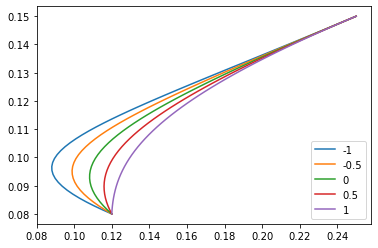

In [13]:
plt.plot(sd_mat[0, :], mean, label='-1')
plt.plot(sd_mat[1, :], mean, label='-0.5')
plt.plot(sd_mat[2, :], mean, label='0')
plt.plot(sd_mat[3, :], mean, label='0.5')
plt.plot(sd_mat[4, :], mean, label='1')
plt.legend(loc='lower right')

### More Assests

#### Expectations 

\begin{equation}
E(R_p) = \sum [ \omega_iE(R_i) ] 
\end{equation}

#### Variance

\begin{equation}
\sigma^2(R_p) = \sigma^2 [ \sum (\omega_iR_i) ] = \sum [\omega_i^2 \ sigma^2 (R_i)] + \sum_{i≠j}\omega_i\omega_j\sigma(R_i, R_j)
\end{equation}

## Prediction with LSTM

In [14]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
from sklearn.preprocessing import scale
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

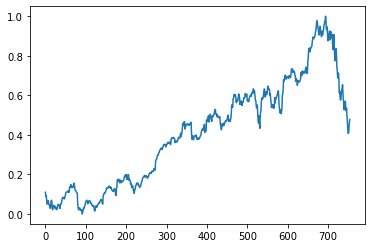

In [15]:
# Load Stock data
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2019, 1, 1)
dataset_train = web.DataReader('AAPL', 'yahoo', start, end)
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# creates a plot of the data and then displays it
plt.plot(training_set_scaled)
plt.show()

In [16]:
dataset_train.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,26.757500,26.205000,26.752501,26.315001,163649200.0,24.182106
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.202784
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.596279
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.134508
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.158121


In [17]:
X_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
22/22 [==============================] - 1s 66ms/step - loss: 0.0577
Epoch 2/100
22/22 [==============================] - 1s 60ms/step - loss: 0.0095
Epoch 3/100
22/22 [==============================] - 1s 59ms/step - loss: 0.0070
Epoch 4/100
22/22 [==============================] - 1s 58ms/step - loss: 0.0077
Epoch 5/100
22/22 [==============================] - 1s 57ms/step - loss: 0.0068
Epoch 6/100
22/22 [==============================] - 1s 57ms/step - loss: 0.0062
Epoch 7/100
22/22 [==============================] - 1s 59ms/step - loss: 0.0065
Epoch 8/100
22/22 [==============================] - 1s 64ms/step - loss: 0.0072
Epoch 9/100
22/22 [==============================] - 1s 60ms/step - loss: 0.0056
Epoch 10/100
22/22 [==============================] - 1s 65ms/step - loss: 0.0053
Epoch 11/100
22/22 [==============================] - 1s 59ms/step - loss: 0.0051
Epoch 12/100
22/22 [==============================] - 1s 59ms/step - loss: 0.0050
Epoch 13/100
22/22 [=====

**In order to predict future stock prices we need to do a couple of things after loading in the test set:**

1. Merge the training set and the test set on the 0 axis.
2. Set the time step as 60 (as seen previously)
3. Use MinMaxScaler to transform the new dataset
4. Reshape the dataset as done previously

In [20]:
# Read Test Data
start = datetime.datetime(2019, 1, 1)
end = datetime.date.today()
dataset_test = web.DataReader('AAPL', 'yahoo', start, end)
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, len(dataset_test)):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

print(X_test.shape)
print(X_train.shape)

(423, 60, 1)
(695, 60, 1)


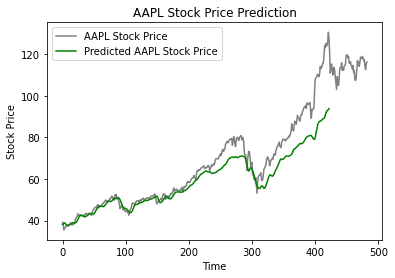

In [21]:
plt.plot(real_stock_price, color = 'grey', label = 'AAPL Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()